# Analysis

**Table of contents**<a id='toc0_'></a>    
- 1. [Floating exchange rate](#toc1_)    
  - 1.1. [Foreign shock](#toc1_1_)    
  - 1.2. [Decomposition of HANK and RANK responses](#toc1_2_)    
- 2. [Fixed exchange rate](#toc2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ["NUMBA_PARFOR_MAX_TUPLE_SIZE"] = "200"

import numpy as np
import pandas as pd
import numba as nb
nb.set_num_threads(4)

import matplotlib.pyplot as plt

import figs
from IHANKModel import HANKModelClass, HANKModelClass_RA, create_model

In [2]:
lstyles = ['-', '-', '-.']
colors = ['C0','C1']
lwidth = 2.5
labels =  ['HANK', 'RANK']

## 1. <a id='toc1_'></a>[Floating exchange rate](#toc0_)

In [3]:
model_specs = {
    'HANK':{'HH_type':'HA'}, 
    'RANK':{'HH_type':'RA-IM'},
}

models = {name:create_model(name,val) for name,val in model_specs.items()}

HANK


RANK


### 1.1. <a id='toc1_1_'></a>[Foreign shock](#toc0_)

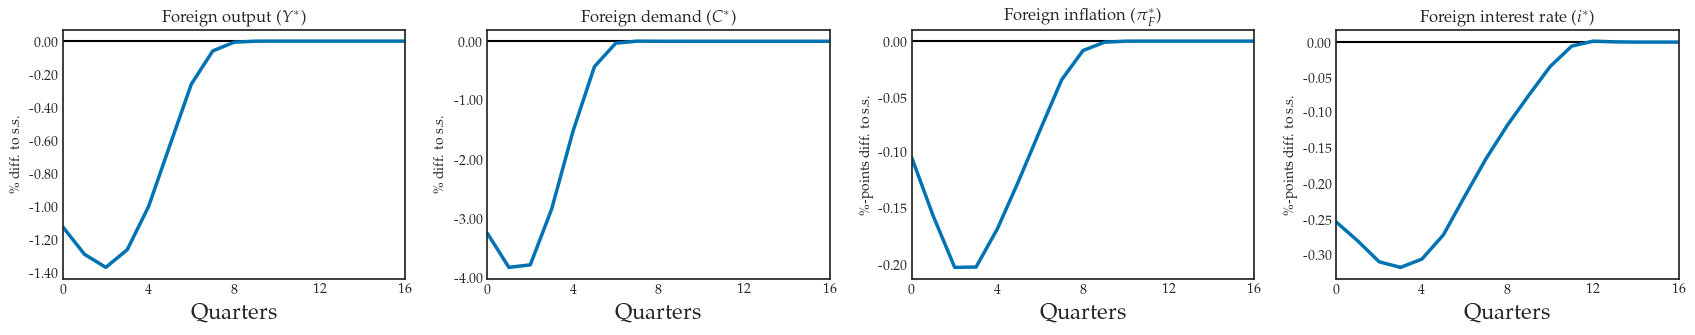

In [4]:
paths_foreign = ['Y_s','C_s','piF_s','iF_s']
fig = figs.show_IRFs(models=[models['HANK']],paths=paths_foreign,labels=labels,
                     lstyles=lstyles,colors=colors,lwidth=lwidth)    
fig.savefig(f'plots\shock_comp.pdf')

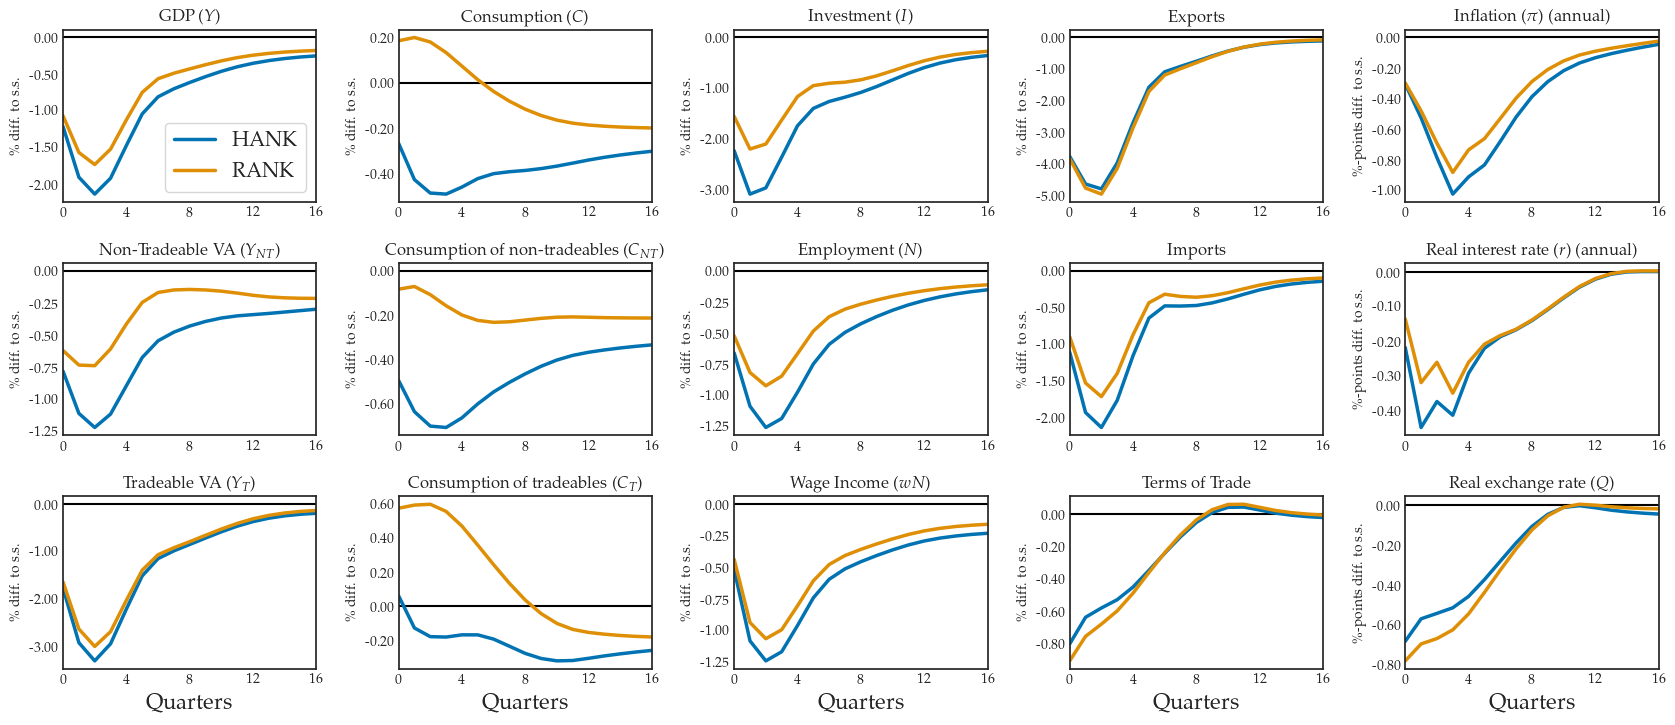

In [5]:
fig = figs.show_IRFs(models=models,paths='standard',labels=labels,
    lwidth=lwidth,lstyles=lstyles,colors=colors,figsize=[3.4,2.5])   

fig.savefig(f'plots/responses_floating.pdf')

### 1.2. <a id='toc1_2_'></a>[Decomposition of HANK and RANK responses](#toc0_)

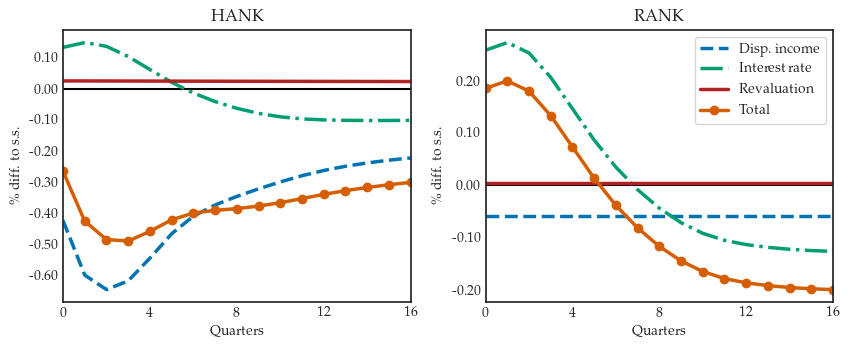

In [6]:
fig = figs.C_decomp_HA_v_RA([models['HANK'],models['RANK']],T_max=17,lwidth=2.5,disp_income=True)
fig.savefig(f'plots\HANK_RANK_decomp.pdf')

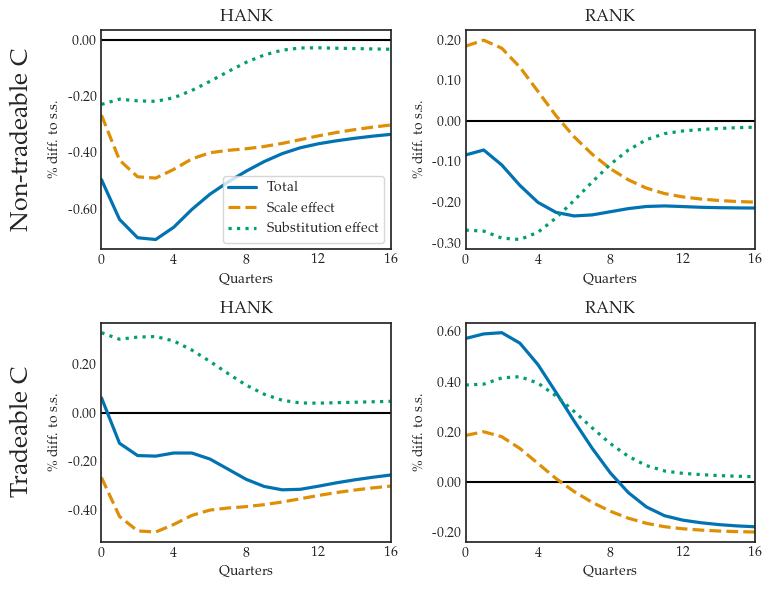

In [7]:
fig = figs.trad_nontrad_decomp(models, labels=['HANK','RANK'], T_max=17)
fig.savefig(f'plots\HANK_RANK_decomp_CT_CNT.pdf')

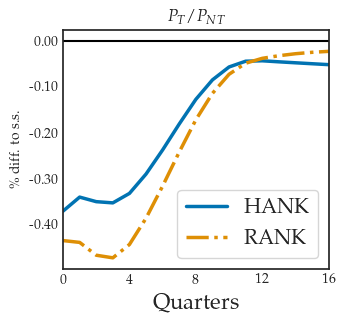

In [8]:
models_ = {}
for name,model_ in models.items():

    model__ = model_.copy()
    model__.ss.PT_PNT = model_.ss.PT/model_.ss.PNT
    model__.path.PT_PNT = model_.path.PT/model_.path.PNT
    models_[name] = model__

fig = figs.show_IRFs(models=models_,paths=['PT_PNT'],labels=labels,
                     lwidth=lwidth,lstyles=['-','-.'],colors=colors,maxcol=3,figsize=[3.7,3.5])   

fig.savefig(f'plots\PT_PNT_comp.pdf')
del models_

## 2. <a id='toc2_'></a>[Fixed exchange rate](#toc0_)

In [9]:
model_fixed_specs = {
    'HANK':{'HH_type':'HA','floating':False},
    'RANK':{'HH_type':'RA-IM','floating':False},
}

models_fixed = {name:create_model(name,val) for name,val in model_fixed_specs.items()}

HANK


RANK


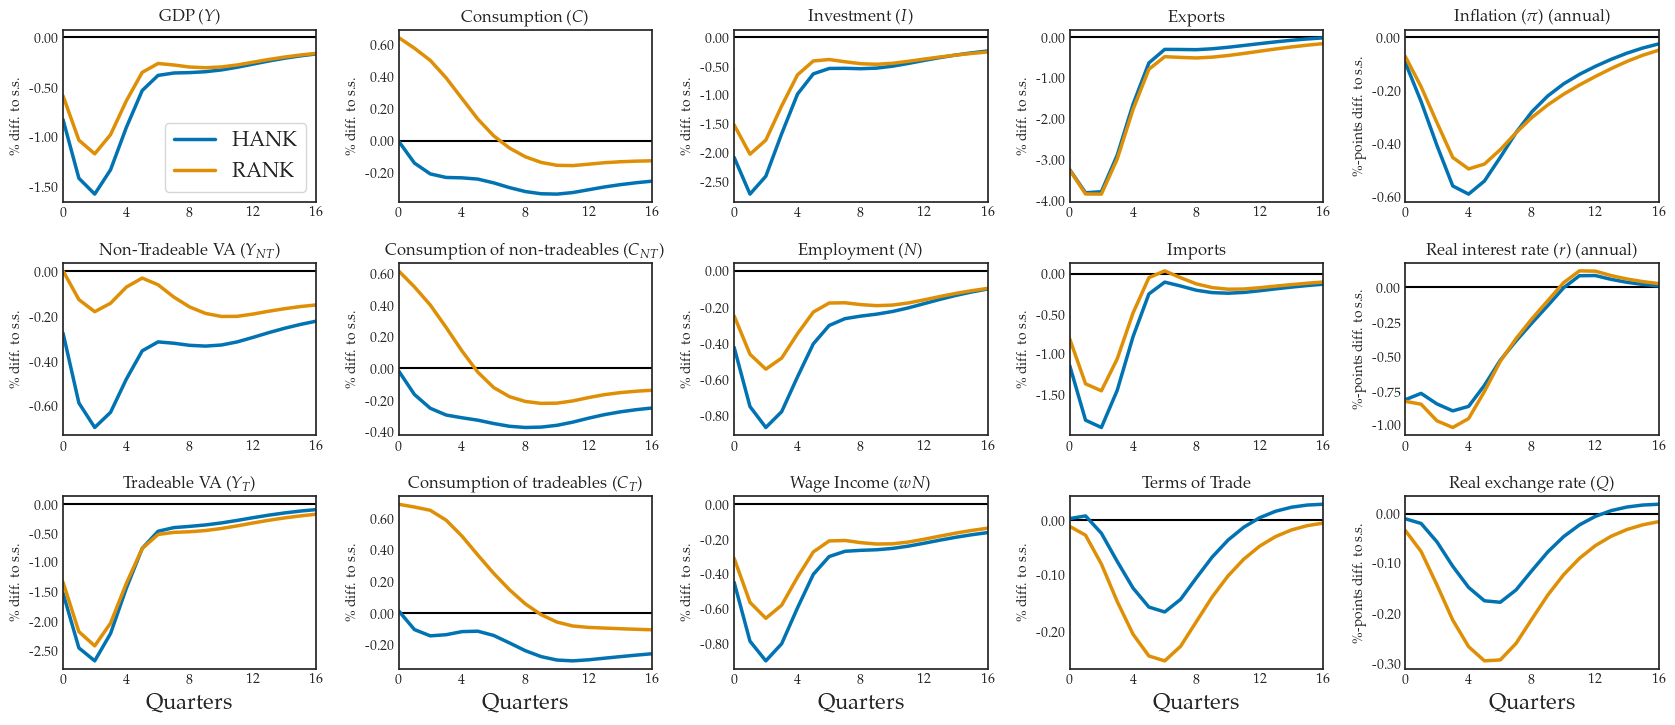

In [10]:
fig = figs.show_IRFs(models=models_fixed,paths='standard',labels=labels,
                     lstyles=lstyles,colors=colors,lwidth=lwidth,figsize=[3.4,2.5])

fig.savefig(f'plots/responses_fixed.pdf')